# ***E-Commerce Sales Analytics & Business Insights***
-----

## ***`Project Overview`***

This project uses Exploratory Data Analysis (EDA) on an e-commerce sales dataset (10,000 orders) to understand customer buying behavior, platform and city performance, and product trends.
Python libraries like Pandas, Matplotlib, and Seaborn are used to turn raw data into useful business insights.

## ***`Objective`***

- Analyze sales trends by city, platform, category, and brand
- Identify top revenue-generating products and platforms
- Understand the impact of customer ratings on sales
- Provide data-driven business recommendations

# ***`Problem Statement`***

1. Which cities generate the highest number of orders and revenue?
2. Which brands and product categories contribute the most to sales?
3. How do price segments (Low, Medium, High) affect order volume and revenue?
4. Is there a difference in sales between weekdays and weekends?
5. How do seasons impact customer purchasing behavior?

# ***`Why This Dataset Was Chosen`***

- Represents a real-world e-commerce scenario
- Contains important features like price, rating, category, and location
- Suitable for complete EDA practice
- Helps understand customer behavior and revenue patterns
- Useful for building skills required for Data Analyst roles

# ***Libraries Used***
---------

In [9]:
#Importing necessary libraries

import pandas as pd                      #for data manipulation and analysis using DataFrames.
import numpy as np                       #for numerical operations and array handling.
import matplotlib.pyplot as plt          #for creating basic static visualizations.
import seaborn as sns                    #for advanced and visually appealing statistical plots.
import plotly.express as px              #for interactive and dynamic charts.
import warnings                          #to manage warning messages.
warnings.filterwarnings("ignore")        #Suppresses all warning messages to keep output clean.

## ***Loading Dataset into Notebook***
-----------------

In [3]:
#Uploading dataset into python notebook using panda.

df = pd.read_csv(r'ecommerce_10000.csv')        #Reads a CSV file and loads it into a Pandas DataFrame for analysis.
df

,OrderID,Product,Category,Brand,Platform,City,Price,Quantity,TotalAmount,Rating,Reviews,OrderDate
0,ORD100000,Samsung Galaxy A14,Electronics,Samsung,Souq,Cairo,16284.02,1,16284.02,1.39,1684,2024-11-11
1,ORD100001,Nike Air Max,Fashion,Nike,Jumia,Alexandria,6645.20,2,13290.40,2.56,3604,2024-06-22
2,ORD100002,Bluetooth Headset,Accessories,JBL,Jumia,Casablanca,8882.92,3,26648.76,4.98,1257,2024-05-27
3,ORD100003,HP Pavilion Laptop,Computers,HP,Souq,Dubai,3665.44,1,3665.44,1.44,662,2024-07-25
4,ORD100004,iPhone 13,Electronics,Apple,Souq,Casablanca,5210.37,2,10420.74,3.73,2424,2024-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ORD109995,HP Pavilion Laptop,Computers,HP,Jumia,Riyadh,3571.93,1,3571.93,1.05,2154,2024-05-21
9996,ORD109996,Adidas Running Shoes,Fashion,Adidas,Souq,Cairo,2974.55,4,11898.20,2.60,1796,2024-11-27
9997,ORD109997,Adidas Running Shoes,Fashion,Adidas,Amazon,Riyadh,8646.20,1,8646.20,3.20,4001,2024-10-15
9998,ORD109998,T-shirt Cotton,Fashion,Generic,Amazon,Riyadh,4960.53,4,19842.12,3.42,685,2024-04-26


# ***Dataset Overview***
---------

In [4]:
df.shape
#Returns the number of rows and columns in the dataset.
#Helps understand the size and scale of the data

(10000, 12)

In [6]:
df.info()            #returns column types & missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      10000 non-null  object 
 1   Product      10000 non-null  object 
 2   Category     10000 non-null  object 
 3   Brand        10000 non-null  object 
 4   Platform     10000 non-null  object 
 5   City         10000 non-null  object 
 6   Price        10000 non-null  float64
 7   Quantity     10000 non-null  int64  
 8   TotalAmount  10000 non-null  float64
 9   Rating       10000 non-null  float64
 10  Reviews      10000 non-null  int64  
 11  OrderDate    10000 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 937.6+ KB


In [5]:
round(df.describe(),0)         #summary statistics for numerical columns.

,Price,Quantity,TotalAmount,Rating,Reviews
count,10000.0,10000.0,10000.0,10000.0,10000.0
mean,10028.0,3.0,30200.0,3.0,2520.0
std,5728.0,1.0,23862.0,1.0,1444.0
min,106.0,1.0,114.0,1.0,0.0
25%,5000.0,2.0,11067.0,2.0,1275.0
50%,10064.0,3.0,23672.0,3.0,2538.0
75%,14938.0,4.0,44649.0,4.0,3767.0
max,19999.0,5.0,99994.0,5.0,5000.0


In [12]:
df.describe(include=object)            #Only describe columns that contain text

,OrderID,Product,Category,Brand,Platform,City,OrderDate
count,10000,10000,10000,10000,10000,10000,10000
unique,10000,10,5,10,3,6,361
top,ORD109983,Samsung Galaxy A14,Electronics,Samsung,Souq,Cairo,2024-12-02
freq,1,1043,3028,1043,3371,1705,46


In [13]:
df.columns             #Lists all column names.

Index(['OrderID', 'Product', 'Category', 'Brand', 'Platform', 'City', 'Price',
       'Quantity', 'TotalAmount', 'Rating', 'Reviews', 'OrderDate'],
      dtype='object')

# ***Data Cleaning***
--------

In [7]:
df.isnull().sum()
#isnull() checks for any null values in each cell of dataframe
#sum() adds up all true values column wise

OrderID        0
Product        0
Category       0
Brand          0
Platform       0
City           0
Price          0
Quantity       0
TotalAmount    0
Rating         0
Reviews        0
OrderDate      0
dtype: int64

In [15]:
df.duplicated().sum()
#It checks duplicated rows. Important for data accuracy.

np.int64(0)

In [15]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')
df['OrderDate'].info()

#earlier 'Date' column was in 'OBJECT' datatype which was incorrect.
#we used 'pd.to_datetime' to convert them into actual datetime format that Python understands.
#If a value cannot be converted, make it empty (NaN) instead of giving an error.

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: OrderDate
Non-Null Count  Dtype         
--------------  -----         
10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.3 KB


# ***Feature Engineering***
-----

In [18]:
df['Order_Month'] = df['OrderDate'].dt.month
df['Order_Year'] = df['OrderDate'].dt.year
df

,OrderID,Product,Category,Brand,Platform,City,Price,Quantity,TotalAmount,Rating,Reviews,OrderDate,Order_Month,Order_Year
0,ORD100000,Samsung Galaxy A14,Electronics,Samsung,Souq,Cairo,16284.02,1,16284.02,1.39,1684,2024-11-11,11,2024
1,ORD100001,Nike Air Max,Fashion,Nike,Jumia,Alexandria,6645.20,2,13290.40,2.56,3604,2024-06-22,6,2024
2,ORD100002,Bluetooth Headset,Accessories,JBL,Jumia,Casablanca,8882.92,3,26648.76,4.98,1257,2024-05-27,5,2024
3,ORD100003,HP Pavilion Laptop,Computers,HP,Souq,Dubai,3665.44,1,3665.44,1.44,662,2024-07-25,7,2024
4,ORD100004,iPhone 13,Electronics,Apple,Souq,Casablanca,5210.37,2,10420.74,3.73,2424,2024-02-19,2,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ORD109995,HP Pavilion Laptop,Computers,HP,Jumia,Riyadh,3571.93,1,3571.93,1.05,2154,2024-05-21,5,2024
9996,ORD109996,Adidas Running Shoes,Fashion,Adidas,Souq,Cairo,2974.55,4,11898.20,2.60,1796,2024-11-27,11,2024
9997,ORD109997,Adidas Running Shoes,Fashion,Adidas,Amazon,Riyadh,8646.20,1,8646.20,3.20,4001,2024-10-15,10,2024
9998,ORD109998,T-shirt Cotton,Fashion,Generic,Amazon,Riyadh,4960.53,4,19842.12,3.42,685,2024-04-26,4,2024


# Creating Price Categories (Low, Medium, High)

In [19]:
def price_category(price):       
    if price < 5000:
        return 'Low'
    elif price < 15000:
        return 'Medium'
    else:
        return 'High'

df['Price_Category'] = df['Price'].apply(price_category)
df

,OrderID,Product,Category,Brand,Platform,City,Price,Quantity,TotalAmount,Rating,Reviews,OrderDate,Order_Month,Order_Year,Price_Category
0,ORD100000,Samsung Galaxy A14,Electronics,Samsung,Souq,Cairo,16284.02,1,16284.02,1.39,1684,2024-11-11,11,2024,High
1,ORD100001,Nike Air Max,Fashion,Nike,Jumia,Alexandria,6645.20,2,13290.40,2.56,3604,2024-06-22,6,2024,Medium
2,ORD100002,Bluetooth Headset,Accessories,JBL,Jumia,Casablanca,8882.92,3,26648.76,4.98,1257,2024-05-27,5,2024,Medium
3,ORD100003,HP Pavilion Laptop,Computers,HP,Souq,Dubai,3665.44,1,3665.44,1.44,662,2024-07-25,7,2024,Low
4,ORD100004,iPhone 13,Electronics,Apple,Souq,Casablanca,5210.37,2,10420.74,3.73,2424,2024-02-19,2,2024,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ORD109995,HP Pavilion Laptop,Computers,HP,Jumia,Riyadh,3571.93,1,3571.93,1.05,2154,2024-05-21,5,2024,Low
9996,ORD109996,Adidas Running Shoes,Fashion,Adidas,Souq,Cairo,2974.55,4,11898.20,2.60,1796,2024-11-27,11,2024,Low
9997,ORD109997,Adidas Running Shoes,Fashion,Adidas,Amazon,Riyadh,8646.20,1,8646.20,3.20,4001,2024-10-15,10,2024,Medium
9998,ORD109998,T-shirt Cotton,Fashion,Generic,Amazon,Riyadh,4960.53,4,19842.12,3.42,685,2024-04-26,4,2024,Low


# Creating Day Type Column

In [20]:
df['Day_Type'] = df['OrderDate'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
df


,OrderID,Product,Category,Brand,Platform,City,Price,Quantity,TotalAmount,Rating,Reviews,OrderDate,Order_Month,Order_Year,Price_Category,Day_Type
0,ORD100000,Samsung Galaxy A14,Electronics,Samsung,Souq,Cairo,16284.02,1,16284.02,1.39,1684,2024-11-11,11,2024,High,Weekday
1,ORD100001,Nike Air Max,Fashion,Nike,Jumia,Alexandria,6645.20,2,13290.40,2.56,3604,2024-06-22,6,2024,Medium,Weekend
2,ORD100002,Bluetooth Headset,Accessories,JBL,Jumia,Casablanca,8882.92,3,26648.76,4.98,1257,2024-05-27,5,2024,Medium,Weekday
3,ORD100003,HP Pavilion Laptop,Computers,HP,Souq,Dubai,3665.44,1,3665.44,1.44,662,2024-07-25,7,2024,Low,Weekday
4,ORD100004,iPhone 13,Electronics,Apple,Souq,Casablanca,5210.37,2,10420.74,3.73,2424,2024-02-19,2,2024,Medium,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ORD109995,HP Pavilion Laptop,Computers,HP,Jumia,Riyadh,3571.93,1,3571.93,1.05,2154,2024-05-21,5,2024,Low,Weekday
9996,ORD109996,Adidas Running Shoes,Fashion,Adidas,Souq,Cairo,2974.55,4,11898.20,2.60,1796,2024-11-27,11,2024,Low,Weekday
9997,ORD109997,Adidas Running Shoes,Fashion,Adidas,Amazon,Riyadh,8646.20,1,8646.20,3.20,4001,2024-10-15,10,2024,Medium,Weekday
9998,ORD109998,T-shirt Cotton,Fashion,Generic,Amazon,Riyadh,4960.53,4,19842.12,3.42,685,2024-04-26,4,2024,Low,Weekday


# Classifying Orders by Season

In [21]:
def season(month):
    if month in [3,4,5]:
        return 'Summer'
    elif month in [6,7,8]:
        return 'Monsoon'
    elif month in [9,10,11]:
        return 'Autumn'
    else:
        return 'Winter'

df['Season'] = df['Order_Month'].apply(season)
df

,OrderID,Product,Category,Brand,Platform,City,Price,Quantity,TotalAmount,Rating,Reviews,OrderDate,Order_Month,Order_Year,Price_Category,Day_Type,Season
0,ORD100000,Samsung Galaxy A14,Electronics,Samsung,Souq,Cairo,16284.02,1,16284.02,1.39,1684,2024-11-11,11,2024,High,Weekday,Autumn
1,ORD100001,Nike Air Max,Fashion,Nike,Jumia,Alexandria,6645.20,2,13290.40,2.56,3604,2024-06-22,6,2024,Medium,Weekend,Monsoon
2,ORD100002,Bluetooth Headset,Accessories,JBL,Jumia,Casablanca,8882.92,3,26648.76,4.98,1257,2024-05-27,5,2024,Medium,Weekday,Summer
3,ORD100003,HP Pavilion Laptop,Computers,HP,Souq,Dubai,3665.44,1,3665.44,1.44,662,2024-07-25,7,2024,Low,Weekday,Monsoon
4,ORD100004,iPhone 13,Electronics,Apple,Souq,Casablanca,5210.37,2,10420.74,3.73,2424,2024-02-19,2,2024,Medium,Weekday,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ORD109995,HP Pavilion Laptop,Computers,HP,Jumia,Riyadh,3571.93,1,3571.93,1.05,2154,2024-05-21,5,2024,Low,Weekday,Summer
9996,ORD109996,Adidas Running Shoes,Fashion,Adidas,Souq,Cairo,2974.55,4,11898.20,2.60,1796,2024-11-27,11,2024,Low,Weekday,Autumn
9997,ORD109997,Adidas Running Shoes,Fashion,Adidas,Amazon,Riyadh,8646.20,1,8646.20,3.20,4001,2024-10-15,10,2024,Medium,Weekday,Autumn
9998,ORD109998,T-shirt Cotton,Fashion,Generic,Amazon,Riyadh,4960.53,4,19842.12,3.42,685,2024-04-26,4,2024,Low,Weekday,Summer


# Classifying Cities into Tiers

In [11]:
top_cities = df['City'].value_counts().head(5).index

df['City_Tier'] = df['City'].apply(
    lambda x: 'Tier 1' if x in top_cities else 'Tier 2/3'
)
df

,OrderID,Product,Category,Brand,Platform,City,Price,Quantity,TotalAmount,Rating,Reviews,OrderDate,City_Tier
0,ORD100000,Samsung Galaxy A14,Electronics,Samsung,Souq,Cairo,16284.02,1,16284.02,1.39,1684,2024-11-11,Tier 1
1,ORD100001,Nike Air Max,Fashion,Nike,Jumia,Alexandria,6645.20,2,13290.40,2.56,3604,2024-06-22,Tier 1
2,ORD100002,Bluetooth Headset,Accessories,JBL,Jumia,Casablanca,8882.92,3,26648.76,4.98,1257,2024-05-27,Tier 1
3,ORD100003,HP Pavilion Laptop,Computers,HP,Souq,Dubai,3665.44,1,3665.44,1.44,662,2024-07-25,Tier 1
4,ORD100004,iPhone 13,Electronics,Apple,Souq,Casablanca,5210.37,2,10420.74,3.73,2424,2024-02-19,Tier 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ORD109995,HP Pavilion Laptop,Computers,HP,Jumia,Riyadh,3571.93,1,3571.93,1.05,2154,2024-05-21,Tier 1
9996,ORD109996,Adidas Running Shoes,Fashion,Adidas,Souq,Cairo,2974.55,4,11898.20,2.60,1796,2024-11-27,Tier 1
9997,ORD109997,Adidas Running Shoes,Fashion,Adidas,Amazon,Riyadh,8646.20,1,8646.20,3.20,4001,2024-10-15,Tier 1
9998,ORD109998,T-shirt Cotton,Fashion,Generic,Amazon,Riyadh,4960.53,4,19842.12,3.42,685,2024-04-26,Tier 1


# ***Exploratory Data Analysis***
-----------

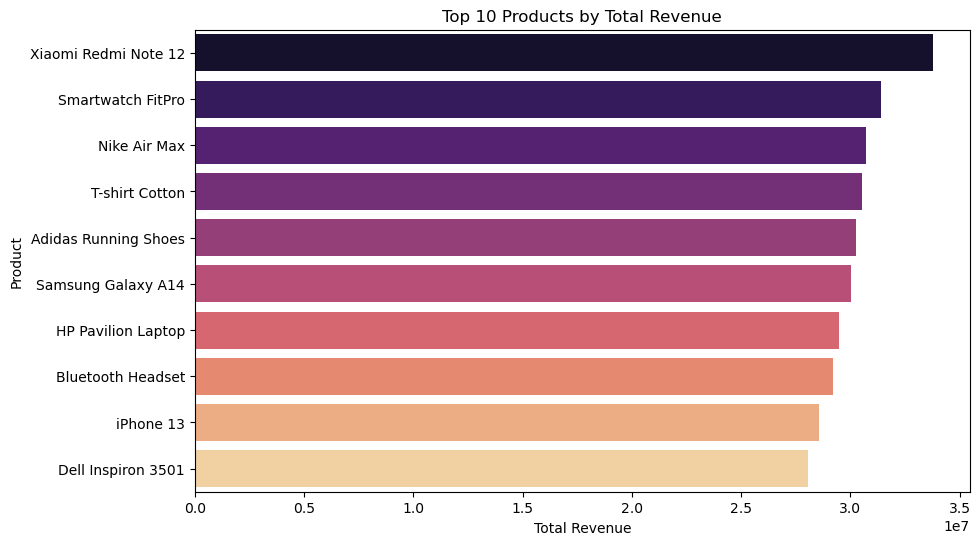

In [18]:
#1️ Top 10 Products by Total Revenue
top_products = (df.groupby('Product')['TotalAmount'].sum().sort_values(ascending=False).head(10).reset_index())

plt.figure(figsize=(10,6))
sns.barplot(data=top_products, y='Product', x='TotalAmount', palette='magma')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.show()


## ***`Purpose`*** 
-Find money-making products

## ***`Insight`***
- A small number of products generate the highest revenue.
- Products like Xiaomi, Redmi Note 12, and FitPro Smartwatch are clear revenue leaders.
- Revenue is concentrated, not evenly spread across products.

## ***`Recommendation`***
- Focus inventory, promotions, and visibility on top revenue-generating products.
- Bundle high-performing products with low-selling ones to boost overall sales.


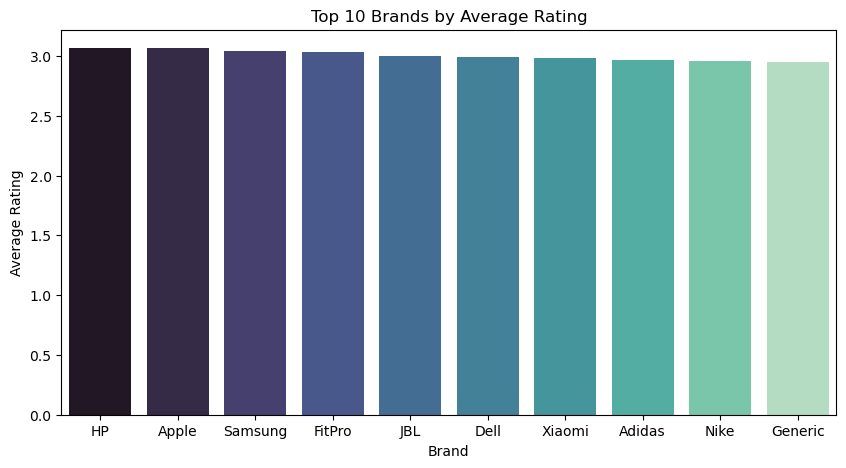

In [29]:
#2️ Brand-wise Average Rating
brand_rating = (df.groupby('Brand')['Rating'].mean().sort_values(ascending=False).head(10).reset_index())

plt.figure(figsize=(10,5))
sns.barplot(data=brand_rating, x='Brand', y='Rating', palette='mako')
plt.title('Top 10 Brands by Average Rating')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.show()



## ***`Purpose`*** 
- Measure customer satisfaction

## ***`Insight`***
- Brands like HP, Apple, and Samsung receive consistently higher customer ratings.
- Differences in ratings are small but still meaningful for customer trust.

## ***`Recommendation`***
- Highlight high-rated brands in marketing to build customer confidence.
- Low-rated brands should be reviewed for quality or service improvements.

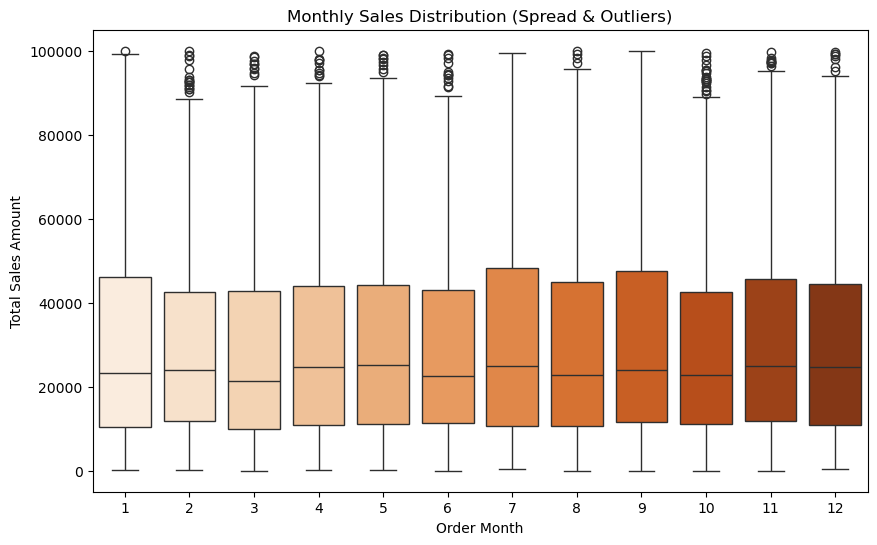

In [66]:
# Monthly Sales Distribution

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Order_Month', y='TotalAmount', palette='Oranges')
plt.title('Monthly Sales Distribution (Spread & Outliers)')
plt.xlabel('Order Month')
plt.ylabel('Total Sales Amount')
plt.show()


## ***`Purpose`***
- Understand sales spread & outliers


## ***`Insight`***
- Every month shows wide variation in sales with many high-value outliers.
- Some months have higher variability, indicating inconsistent order sizes.

## ***`Recommendation`***
- Plan inventory and logistics for peak months to handle large orders.
- Investigate causes of outliers (festivals, discounts, campaigns).

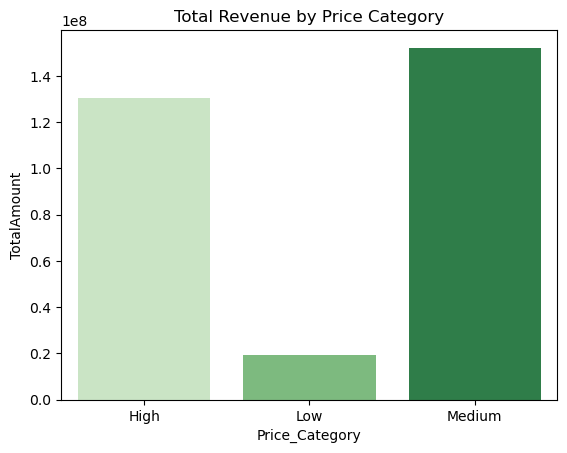

In [43]:
#Price Category vs Total Revenue
t = df.groupby('Price_Category')['TotalAmount'].sum().reset_index()

sns.barplot(x='Price_Category', y='TotalAmount', data=t, palette='Greens')
plt.title('Total Revenue by Price Category')
plt.show()

## ***`Purpose`***
- Identify best price range

## ***`Insight`***
- Medium-priced products generate the highest total revenue.
- High-priced products generate good revenue but sell less frequently.
- Low-priced products contribute the least revenue.

## ***`Recommendation`***
- Focus business strategy on medium-priced products for stable revenue.
- Use low-priced products to attract customers, not as main revenue drivers.

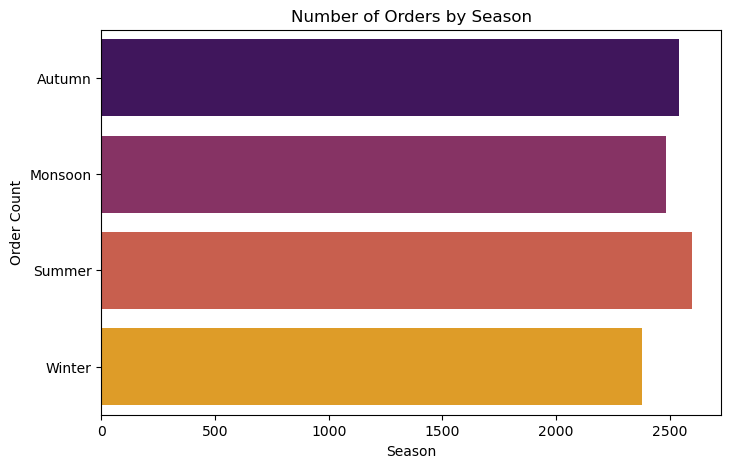

In [82]:
#Number of orders by season
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='Season', palette='inferno')
plt.title('Number of Orders by Season')
plt.xlabel('Season')
plt.ylabel('Order Count')
plt.show()


## ***`Purpose`***
- Seasonal demand analysis

## ***`Insight`***
- Summer and Autumn have the highest order volumes.
- Winter shows comparatively lower demand.

## ***`Recommendation`***
- Increase marketing and stock levels before Summer and Autumn.
- Introduce seasonal offers in Winter to boost demand.

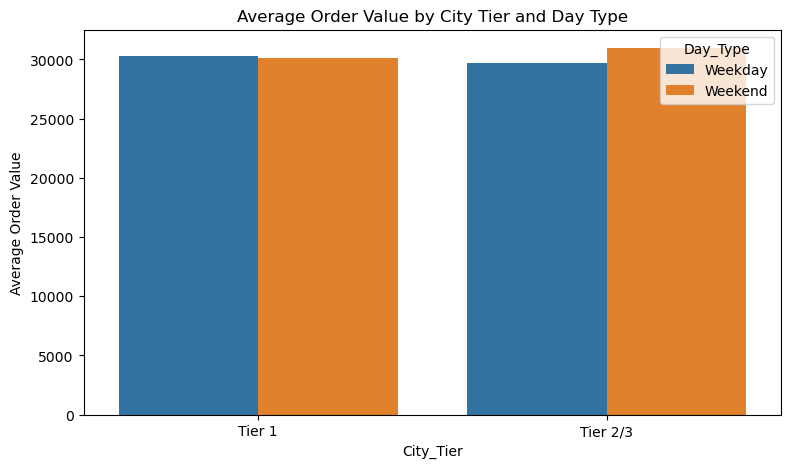

In [83]:
#Average Order Value by City Tier & Day Type
city_day_avg = (df.groupby(['City_Tier', 'Day_Type'])['TotalAmount'].mean().reset_index())

plt.figure(figsize=(9,5))
sns.barplot(data=city_day_avg, x='City_Tier', y='TotalAmount', hue='Day_Type')
plt.title('Average Order Value by City Tier and Day Type')
plt.ylabel('Average Order Value')
plt.show()


## ***`Purpose`***
- Location + time behavior

## ***`Insight`***
- Tier 2/3 cities spend more on weekends.
- Tier 1 cities show stable spending across weekdays and weekends.

## ***`Recommendation`***
- Run weekend-focused campaigns in Tier 2/3 cities.
- Keep steady pricing strategies for Tier 1 cities.

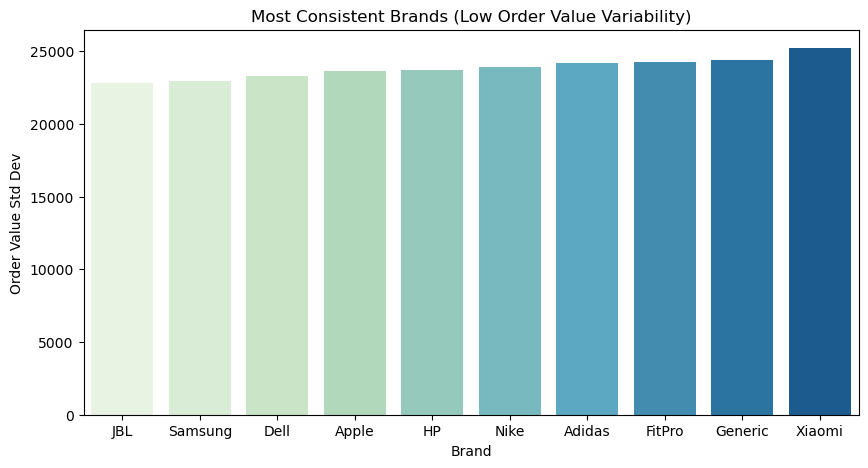

In [61]:
brand_consistency = (df.groupby('Brand')['TotalAmount'].std().sort_values().head(10).reset_index())

plt.figure(figsize=(10,5))
sns.barplot(data=brand_consistency, x='Brand', y='TotalAmount', palette='GnBu')
plt.title('Most Consistent Brands (Low Order Value Variability)')
plt.ylabel('Order Value Std Dev')
plt.show()


## ***`Purpose`*** 
- Stability analysis

## ***`Insight`***
- Brands like JBL and Samsung show stable order values.
- Some brands show higher variability, meaning unpredictable spending.

## ***`Recommendation`***
- Consistent brands are safer for long-term planning.
- High-variability brands may need pricing standardization.

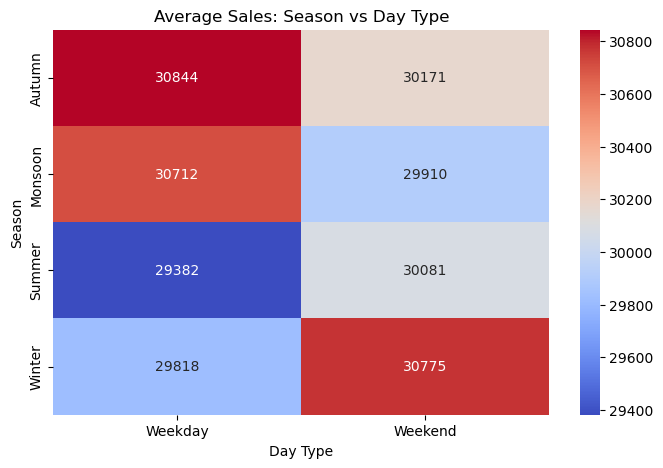

In [68]:
season_day_pivot = df.pivot_table(
    values='TotalAmount',
    index='Season',
    columns='Day_Type',
    aggfunc='mean'
)

plt.figure(figsize=(8,5))
sns.heatmap(season_day_pivot, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Average Sales: Season vs Day Type')
plt.xlabel('Day Type')
plt.ylabel('Season')
plt.show()


## ***`Purpose`***
- Combined pattern analysis

## ***`Insight`***
- Weekends perform better in some seasons.
- Weekdays perform better in other seasons.

## ***`Recommendation`***
- Plan offers based on season and day type.
- Push weekend sales during high-performing seasons.

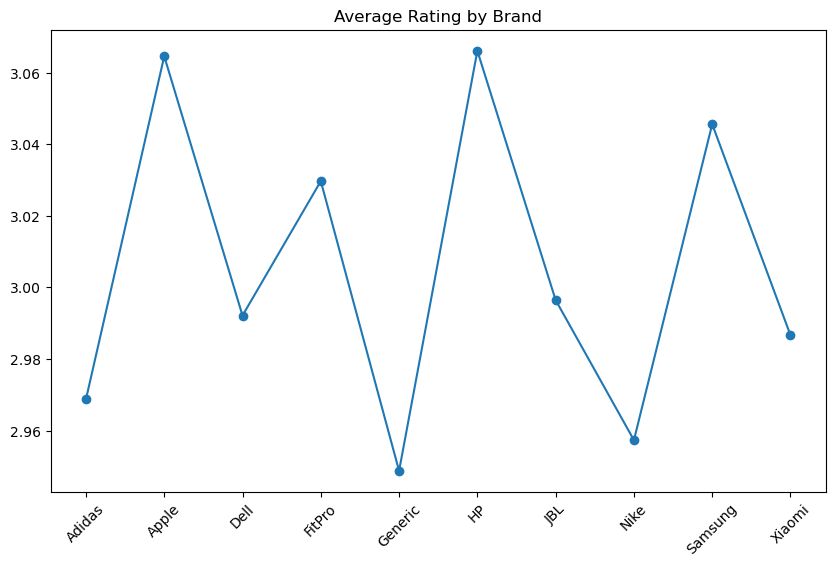

In [77]:
avg_rating = df.groupby('Brand')['Rating'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(
    avg_rating['Brand'],
    avg_rating['Rating'],
    marker='o',
    linestyle='-'
)
plt.title('Average Rating by Brand')
plt.xticks(rotation=45)
plt.show()


## ***`Purpose`***
- Rating trend comparison

## ***`Insight`***
- HP and Apple have the highest average ratings, showing strong customer satisfaction.
- Generic and Nike have the lowest ratings, which may indicate quality or service issues.

## ***`Recommendation`***
- Promote high-rated brands like HP and Apple more, as customers trust them.
- Improve product quality or service for lower-rated brands like Generic and Nike.
- Use customer feedback to fix small issues, since ratings are close and easy to improve.

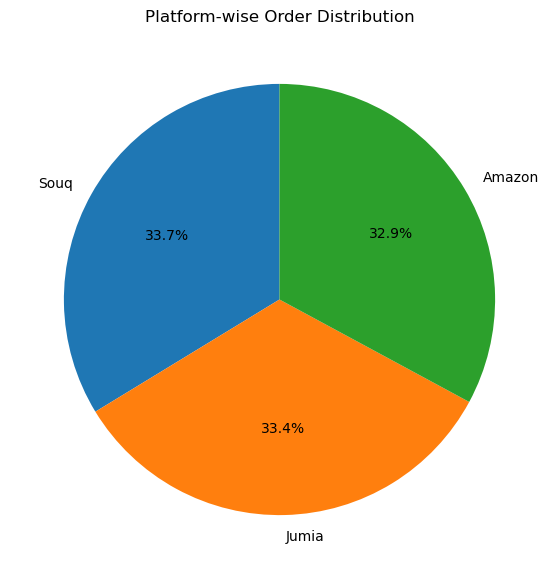

In [72]:
platform_counts = df['Platform'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(
    platform_counts.values,
    labels=platform_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Platform-wise Order Distribution')
plt.show()


## ***`Purpose`***
- Platform contribution

## ***`Insights`***
- Orders are almost equally distributed across Amazon, Jumia, and Souq.
- No single platform clearly dominates customer orders.
- Customers are comfortable shopping on all three platforms.

## ***`Recommendation`***
- Maintain presence on all platforms since demand is balanced.
- Use platform-specific offers to gain an edge over competitors.
- Test small promotions on one platform at a time to see which converts better.

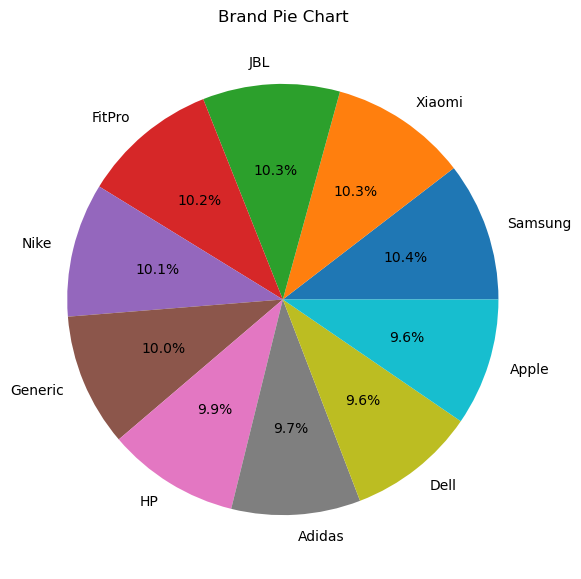

In [14]:
plt.figure(figsize=(7,7))
plt.pie(
    df['Brand'].value_counts(),
    labels=df['Brand'].value_counts().index,
    autopct='%1.1f%%'
)
plt.title('Brand Pie Chart')
plt.show()


## ***`Purpose`***
- To show how orders are distributed across different brands.

## ***`Insight`***
- Order share is almost evenly spread across all brands.
- No single brand dominates the market.
- Each brand contributes roughly 10% of total orders, showing balanced demand.

## ***`Recommendation`***
- Since demand is balanced, continue partnering with all brands.
- Use targeted promotions to push specific brands when needed.
- Focus on branding and differentiation to create a leading brand instead of relying on natural dominance.

# Final Conclusion

This project used Exploratory Data Analysis (EDA) to study an e-commerce sales dataset and understand customer buying patterns, city and platform performance, pricing segments, and seasonal trends.
The analysis showed that sales and revenue are not evenly distributed — a small number of cities, products, and price segments contribute most of the revenue. Customer behavior also changes based on weekdays vs weekends and different seasons. Overall, the project demonstrates how data analysis can convert raw sales data into meaningful business insights.

#  Recommendations

Focus more on Tier 1 cities, as they generate the highest number of orders and revenue.

Promote medium and high-priced products, which contribute significantly to overall sales value.

Increase marketing and offers during high-performing seasons to maximize revenue.

Use weekend-focused campaigns, as customer activity is often higher during weekends.

Monitor customer ratings and reviews, as they influence purchasing decisions and product performance.